In [2]:

from scipy.stats import binom, poisson, norm, expon, uniform, beta, gamma, chi2, t, f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

In [3]:
df = pd.read_csv("StudentSurvey.csv")

In [4]:
# đọc 5 dòng đầu tiên 
df.head()

,Year,Gender,Smoke,Award,HigherSAT,Exercise,TV,Height,Weight,Siblings,BirthOrder,VerbalSAT,MathSAT,SAT,GPA,Pulse,Piercings
0,Senior,M,No,Olympic,Math,10.0,1.0,71.0,180.0,4,4.0,540,670,1210,3.13,54,0.0
1,Sophomore,F,Yes,Academy,Math,4.0,7.0,66.0,120.0,2,2.0,520,630,1150,2.50,66,3.0
2,FirstYear,M,No,Nobel,Math,14.0,5.0,72.0,208.0,2,1.0,550,560,1110,2.55,130,0.0
3,Junior,M,No,Nobel,Math,3.0,1.0,63.0,110.0,1,1.0,490,630,1120,3.10,78,0.0
4,Sophomore,F,No,Nobel,Verbal,3.0,3.0,65.0,150.0,1,1.0,720,450,1170,2.70,40,6.0


In [5]:
df.isna().sum()

Year           2
Gender         0
Smoke          0
Award          0
HigherSAT      7
Exercise       1
TV             1
Height         7
Weight         5
Siblings       0
BirthOrder     3
VerbalSAT      0
MathSAT        0
SAT            0
GPA           17
Pulse          0
Piercings      1
dtype: int64

In [6]:
df = df.dropna(subset=["Year"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 0 to 361
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        360 non-null    object 
 1   Gender      360 non-null    object 
 2   Smoke       360 non-null    object 
 3   Award       360 non-null    object 
 4   HigherSAT   353 non-null    object 
 5   Exercise    359 non-null    float64
 6   TV          359 non-null    float64
 7   Height      353 non-null    float64
 8   Weight      355 non-null    float64
 9   Siblings    360 non-null    int64  
 10  BirthOrder  357 non-null    float64
 11  VerbalSAT   360 non-null    int64  
 12  MathSAT     360 non-null    int64  
 13  SAT         360 non-null    int64  
 14  GPA         345 non-null    float64
 15  Pulse       360 non-null    int64  
 16  Piercings   359 non-null    float64
dtypes: float64(7), int64(5), object(5)
memory usage: 50.6+ KB


In [7]:
bang_pp = df['Year'].value_counts()
print("Bảng phân phối tần số:\n", bang_pp)

Bảng phân phối tần số:
 Year
Sophomore    195
FirstYear     94
Senior        36
Junior        35
Name: count, dtype: int64


In [8]:
bang_pp_ts = df['Year'].value_counts().reset_index()
bang_pp_ts.columns = ['Year', 'Count']
bang_pp_ts['c'] = bang_pp_ts['Count'] / bang_pp_ts['Count'].sum()
print(bang_pp_ts)

        Year  Count         c
0  Sophomore    195  0.541667
1  FirstYear     94  0.261111
2     Senior     36  0.100000
3     Junior     35  0.097222


In [9]:
# tỷ lệ đeo khuyên piercings 
ssv_dk = (df['Piercings'] > 0).sum()
tongso = len(df)
print("Tỷ lệ đeo khuyên: ", ssv_dk / tongso)

Tỷ lệ đeo khuyên:  0.475


In [10]:
nam = df[df['Gender'] == 'M']
nu = df[df['Gender'] == 'F']
dk_nam = (nam['Piercings'] > 0).sum()
dk_nu = (nu['Piercings'] > 0).sum()
tongso = len(nam)
print("Tỷ lệ sinh viên nam: ", dk_nam / tongso)
print("Tỷ lệ sinh viên nữ: ", dk_nu / tongso)

Tỷ lệ sinh viên nam:  0.07253886010362694
Tỷ lệ sinh viên nữ:  0.8134715025906736


Nhận xét: 
- Vậy tỷ lệ sinh viên nữ đeo khuyên cao hơn

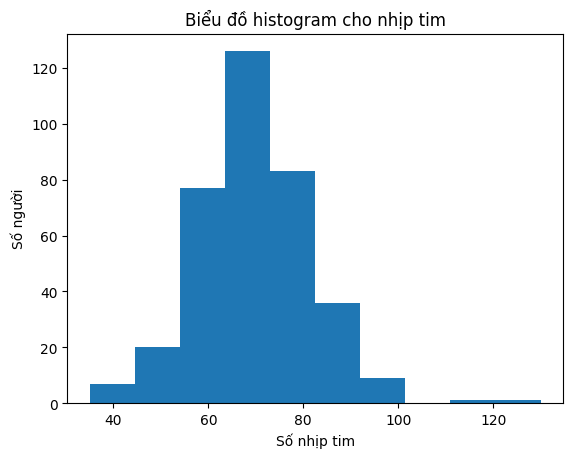

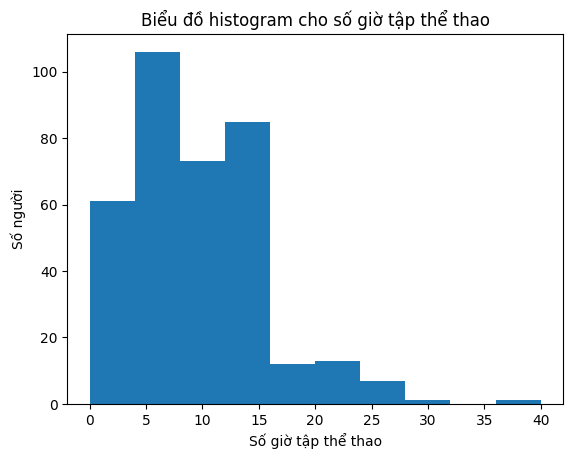

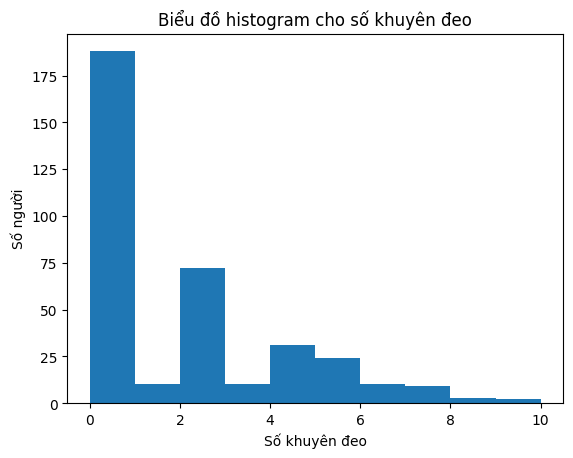

In [10]:
plt.hist(df['Pulse'])
plt.title("Biểu đồ histogram cho nhịp tim")
plt.xlabel("Số nhịp tim")
plt.ylabel("Số người")
plt.show()
plt.hist(df['Exercise'])
plt.title("Biểu đồ histogram cho số giờ tập thể thao")
plt.xlabel("Số giờ tập thể thao")
plt.ylabel("Số người")
plt.show()
plt.hist(df['Piercings'])
plt.title("Biểu đồ histogram cho số khuyên đeo")
plt.xlabel("Số khuyên đeo")
plt.ylabel("Số người")
plt.show()

Nhận xét: 
- Biểu đồ nhịp tim cho thấy: nhịp tim khoảng 70 là nhiều nhất, đối xứng
- Biểu đồ số giờ tập thể thao: đa số mọi người tập khoảng 5 giờ, lệch trái
- Biểu đồ số khuyên đeo: phần đa không đeo khuyên, lệch trái

In [12]:
co_mau = df.sample(n=50)
print(co_mau)

          Year Gender Smoke    Award HigherSAT  Exercise    TV  Height  \
40      Senior      M    No    Nobel    Verbal       5.0   5.0    72.0   
224     Senior      M    No  Olympic      Math       5.0   3.0    71.0   
172     Junior      F    No    Nobel      Math       5.0  10.0    61.0   
283  Sophomore      F    No  Academy    Verbal       5.0   5.0    66.0   
194  Sophomore      M    No  Olympic      Math      20.0  14.0    74.0   
56      Junior      F    No  Academy      Math       3.0  15.0    63.0   
239  Sophomore      M    No    Nobel    Verbal       0.0   7.0     NaN   
154     Senior      M    No  Olympic    Verbal      15.0  10.0    71.0   
259  Sophomore      M    No  Academy      Math       8.0   4.0    69.0   
113  FirstYear      M    No  Olympic      Math      24.0   6.0    78.0   
221  Sophomore      M    No  Olympic      Math      12.0   6.0    72.0   
305  Sophomore      M    No    Nobel      Math       8.0  12.0    70.0   
255  Sophomore      F    No    Nobel  

In [18]:
nu = co_mau[co_mau['Gender'] == 'F']
deo_khuyen_nu = (nu['Piercings'] > 0).sum()
tong_the = len(nu)
tl_nu_mau = deo_khuyen_nu / tong_the
print("Tỷ lệ nữ: ", deo_khuyen_nu / tong_the)

Tỷ lệ nữ:  0.88


In [19]:
nu = df[df['Gender'] == 'F'] 
deo_khuyen_nu = (nu['Piercings'] > 0).sum()
tong_the = len(nu)
tl_nu_tt = deo_khuyen_nu / tong_the
print("Tỷ lệ nữ tổng thể: ", tl_nu_tt)


Tỷ lệ nữ tổng thể:  0.9401197604790419


In [20]:
print("Sai số: ", abs(tl_nu_mau - tl_nu_tt))

Sai số:  0.060119760479041884


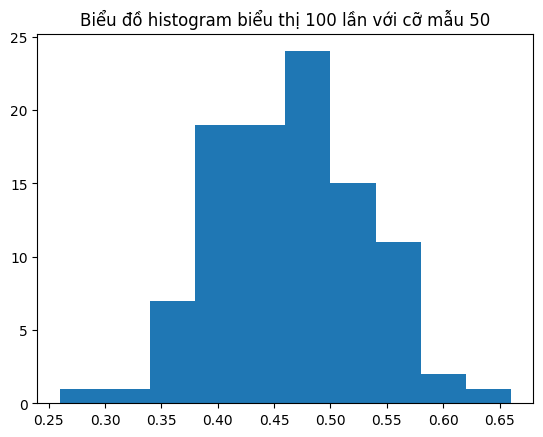

In [21]:
gia_tb = []
for i in range(1, 101): 
    co_mau = df.sample(n=50)
    nu = co_mau[co_mau['Gender'] == 'F']
    tl_nu = len(nu)
    tong_cong = len(co_mau) 
    tl_nu_mau = tl_nu / tong_cong
    gia_tb.append(tl_nu_mau)
plt.hist(gia_tb)
plt.title("Biểu đồ histogram biểu thị 100 lần với cỡ mẫu 50")
plt.show()

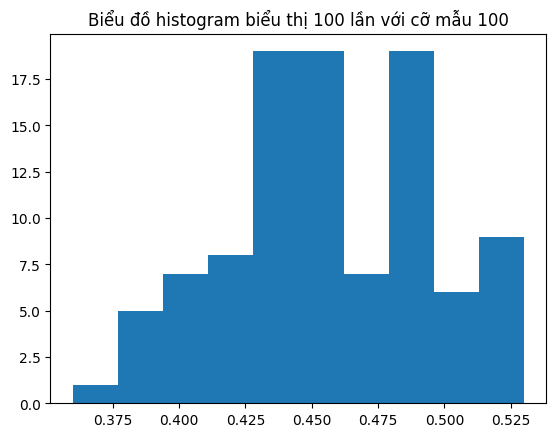

In [22]:
gia_tb = []
for i in range(1, 101): 
    co_mau = df.sample(n=100)
    nu = co_mau[co_mau['Gender'] == 'F']
    tl_nu = len(nu)
    tong_cong = len(co_mau) 
    tl_nu_mau = tl_nu / tong_cong
    gia_tb.append(tl_nu_mau)
plt.hist(gia_tb)
plt.title("Biểu đồ histogram biểu thị 100 lần với cỡ mẫu 100")
plt.show()

Nhận xét: 
- Cho thấy rõ ràng hơn về phân bố của tỷ lệ nữ hơn 
- phần đa năm khoảng [0.4, 0.55] 